In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from matplotlib.offsetbox import AnchoredText
from scipy.signal import argrelextrema
from scipy import stats


d_inter = 0.282E-9
h = 4.14E-15
c = 3e8
e = 1.602E-19

In [50]:
data = pd.read_csv("eq2_M1_filtro_ZrMo.txt",skiprows = 1,header = None, delimiter = '\t', names=['theta','nofilter','zr','mo'])
data['theta'] = data['theta'].str.replace(',','.')

data['theta'] = pd.to_numeric(data['theta'], errors='coerce')
data['theta_wavelength'] = 2*d_inter*np.sin(np.deg2rad(data['theta']))
data['theta_eV'] = np.divide(4.13566743*10**(-15)*2.998*10**8,data['theta_wavelength'])
data['sigma_theta_eV'] = np.deg2rad(0.05)*((h*c)/(2*d_inter))*(np.cos(np.deg2rad(data['theta']))/(np.sin(np.deg2rad(data['theta']))**2))

data['nofilter'] = pd.to_numeric(data['nofilter'], errors='coerce')
data['zr'] = pd.to_numeric(data['zr'], errors='coerce')
data['mo'] = pd.to_numeric(data['mo'], errors='coerce')

data['nofilter_zr'] = np.divide(data['nofilter'],data['zr'])
data['sigma_nofilter_zr']= np.sqrt(np.divide(data['nofilter']**2, data['zr']**3)+np.divide(data['nofilter'], data['zr']**2))
data['nofilter_mo'] = np.divide(data['nofilter'],data['mo'])
data['sigma_nofilter_mo']= np.sqrt(np.divide(data['nofilter']**2, data['mo']**3)+np.divide(data['nofilter'], data['mo']**2))


In [51]:
data

,theta,nofilter,zr,mo,theta_wavelength,theta_eV,sigma_theta_eV,nofilter_zr,sigma_nofilter_zr,nofilter_mo,sigma_nofilter_mo
0,2.5,2,3,4,2.460133e-11,50398.611377,1009.060467,0.666667,0.608581,0.50,0.433013
1,2.6,2,7,2,2.558473e-11,48461.458184,932.908927,0.285714,0.229081,1.00,1.000000
2,2.7,3,2,2,2.656804e-11,46667.845257,865.060952,1.500000,1.369306,1.50,1.369306
3,2.8,2,3,2,2.755127e-11,45002.393287,804.351772,0.666667,0.608581,1.00,1.000000
4,2.9,1,7,0,2.853442e-11,43451.844249,749.813914,0.142857,0.152721,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...
91,11.6,65,16,2,1.134079e-10,10932.858962,46.558491,4.062500,1.133755,32.50,23.331845
92,11.7,53,22,5,1.143720e-10,10840.701576,45.760409,2.409091,0.610991,10.60,4.959032
93,11.8,41,25,4,1.153358e-10,10750.117337,44.982529,1.640000,0.416154,10.25,5.369183
94,11.9,63,13,3,1.162992e-10,10661.066593,44.224174,4.846154,1.476257,21.00,12.409674


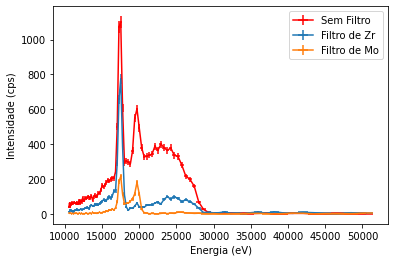

In [22]:

plt.errorbar(data['theta_eV'],data['nofilter'], xerr = data['sigma_theta_eV'], yerr = np.sqrt(data['nofilter']), fmt=  '-', color = 'red', label = 'Sem Filtro')
plt.errorbar(data['theta_eV'],data['zr'], xerr = data['sigma_theta_eV'], yerr = np.sqrt(data['zr']), fmt = '-', label = 'Filtro de Zr')
plt.errorbar(data['theta_eV'],data['mo'], xerr = data['sigma_theta_eV'], yerr = np.sqrt(data['mo']), fmt = '-', label = 'Filtro de Mo')

plt.xlabel('Energia (eV)')
plt.ylabel('Intensidade (cps)')

plt.legend()

plt.savefig('all_data.png',dpi = 300)

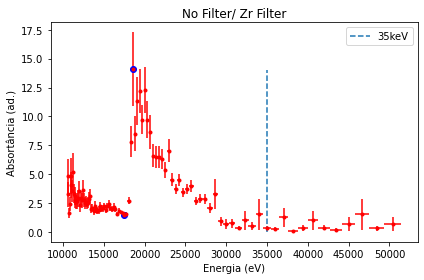

In [54]:
# plt.plot(data['theta_eV'],data['nofilter_zr'], '.')

peak_nofilter_zr,_ = find_peaks(data['nofilter_zr'], height = 0,distance = 8)


plt.errorbar(data['theta_eV'],data['nofilter_zr'] ,xerr = data['sigma_theta_eV'],yerr = data['sigma_nofilter_zr'], fmt = '.', color = 'red')
             
plt.plot(data['theta_eV'][mask_zr_1],data['nofilter_zr'][mask_zr_1], 'o', color = 'blue')
plt.plot(data['theta_eV'][mask_zr_2],data['nofilter_zr'][mask_zr_2], 'o', color = 'blue')
plt.vlines(35e3,-0,14,linestyles='dashed', label = '35keV')
plt.title('No Filter/ Zr Filter')

plt.xlabel('Energia (eV)')
plt.ylabel('Absortância (ad.)')

plt.legend()

plt.tight_layout()
plt.savefig('nofilter_zr.png', dpi = 300)

In [24]:
mask_zr_1 = (data['nofilter_zr'].index == 47)
mask_zr_2 = (data['nofilter_zr'].index == 43)

In [76]:
data['theta_eV'][mask_zr_1]

47    17540.092837
Name: theta_eV, dtype: float64

In [77]:
data['theta_eV'][mask_zr_2]

43    18566.578332
Name: theta_eV, dtype: float64

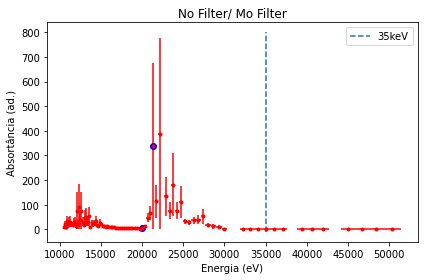

In [56]:
# peak_nofilter_mo,_ = find_peaks(data['nofilter_mo'], height = 0,distance = 8)


plt.errorbar(data['theta_eV'],data['nofilter_mo'] ,xerr = data['sigma_theta_eV'],yerr = data['sigma_nofilter_mo'], fmt = '.', color = 'red')
plt.plot(data['theta_eV'][mask_mo_1],data['nofilter_mo'][mask_mo_1], 'o', color = 'blue')
plt.plot(data['theta_eV'][mask_mo_2],data['nofilter_mo'][mask_mo_2], 'o', color = 'blue')
plt.vlines(35e3,-10,800,linestyles='dashed', label = '35keV')
plt.title('No Filter/ Mo Filter')
plt.legend()

plt.xlabel('Energia (eV)')
plt.ylabel('Absortância (ad.)')

plt.tight_layout()
plt.savefig('nofilter_mo_2.png', dpi = 300)

In [32]:
mask_mo_1 = (data['nofilter_mo'].index == 34)
mask_mo_2 = (data['nofilter_mo'].index == 38)

In [128]:
data['theta_eV'][mask_mo_1]

34    21386.344
Name: theta_eV, dtype: float64

In [129]:
data['theta_eV'][mask_mo_2]

38    20033.447428
Name: theta_eV, dtype: float64